# 1.1 사이킷런과 머신러닝

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
X = [[0,0],[1,1]]
Y = [0, 1]

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier()

In [4]:
clf.predict([[2,2]])

array([1])

In [5]:
clf.predict_proba([[2,2]])

array([[0., 1.]])

- ## iris 데이터

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

In [7]:
X, Y = load_iris(return_X_y = True)

In [8]:
clf.fit(X, Y)

DecisionTreeClassifier()

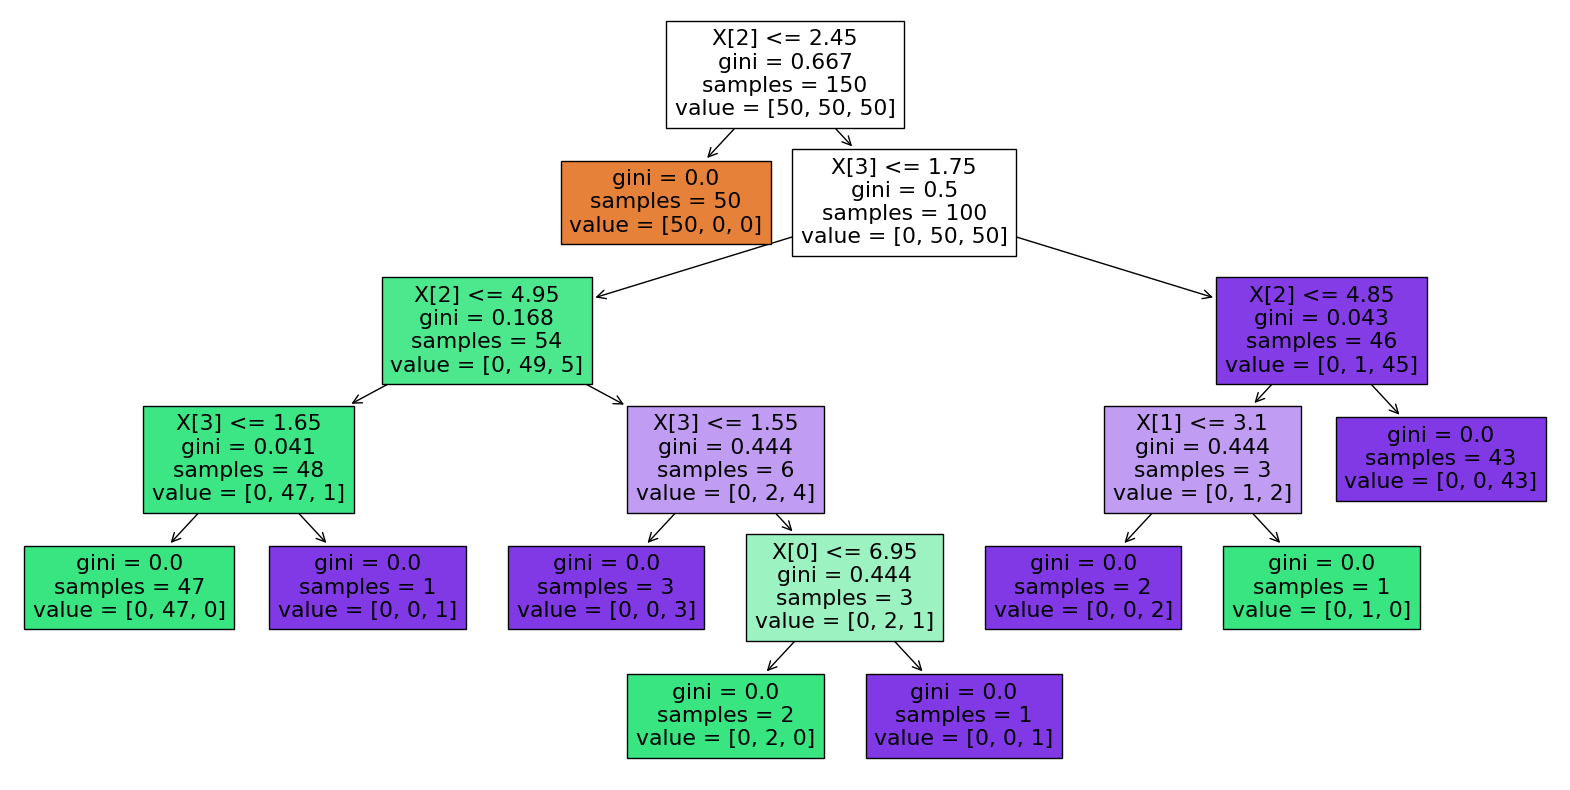

In [9]:
plt.figure(figsize=(20,10))
t = tree.plot_tree(clf.fit(X,Y), filled=True)
plt.show()

In [10]:
import graphviz

In [11]:
iris = load_iris()
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

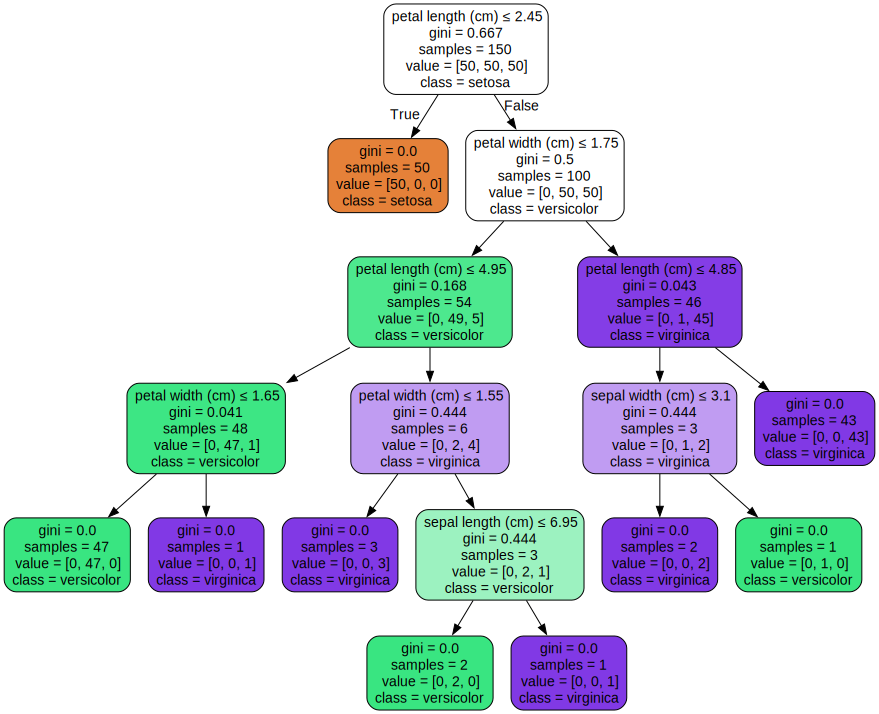

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

---

# 1.2 의사결정나무로 간단한 분류 예측 모델 만들기

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [17]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [18]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [19]:
feature_names = train.columns[:-1].tolist()

In [20]:
label_name = train.columns[-1]
label_name

'Outcome'

- ## 학습, 예측 데이터셋 만들기

In [21]:
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [24]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
y_predict = model.predict(x_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

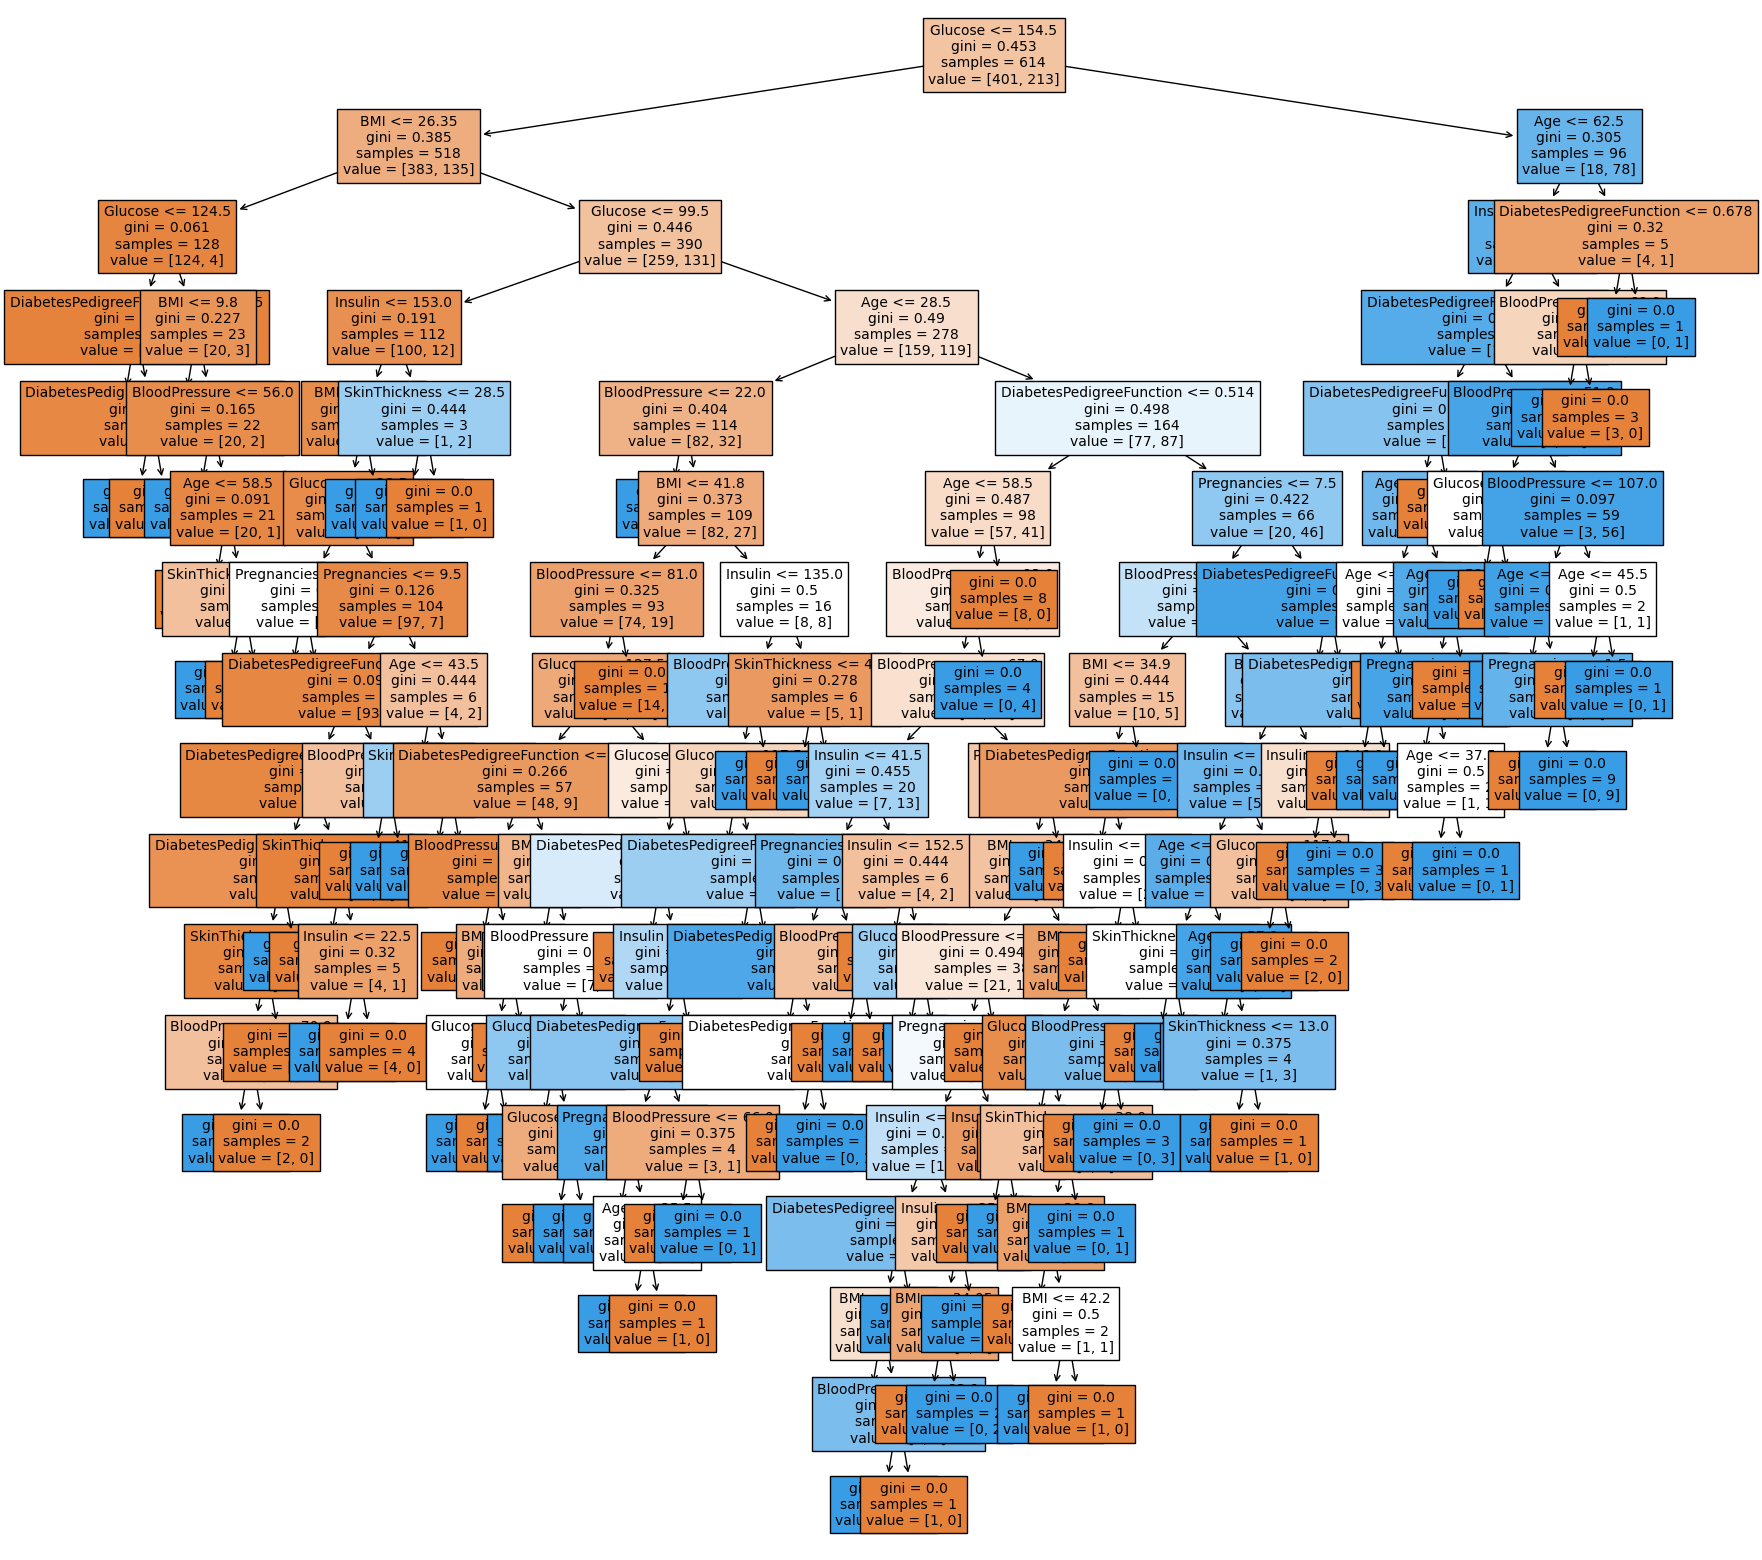

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

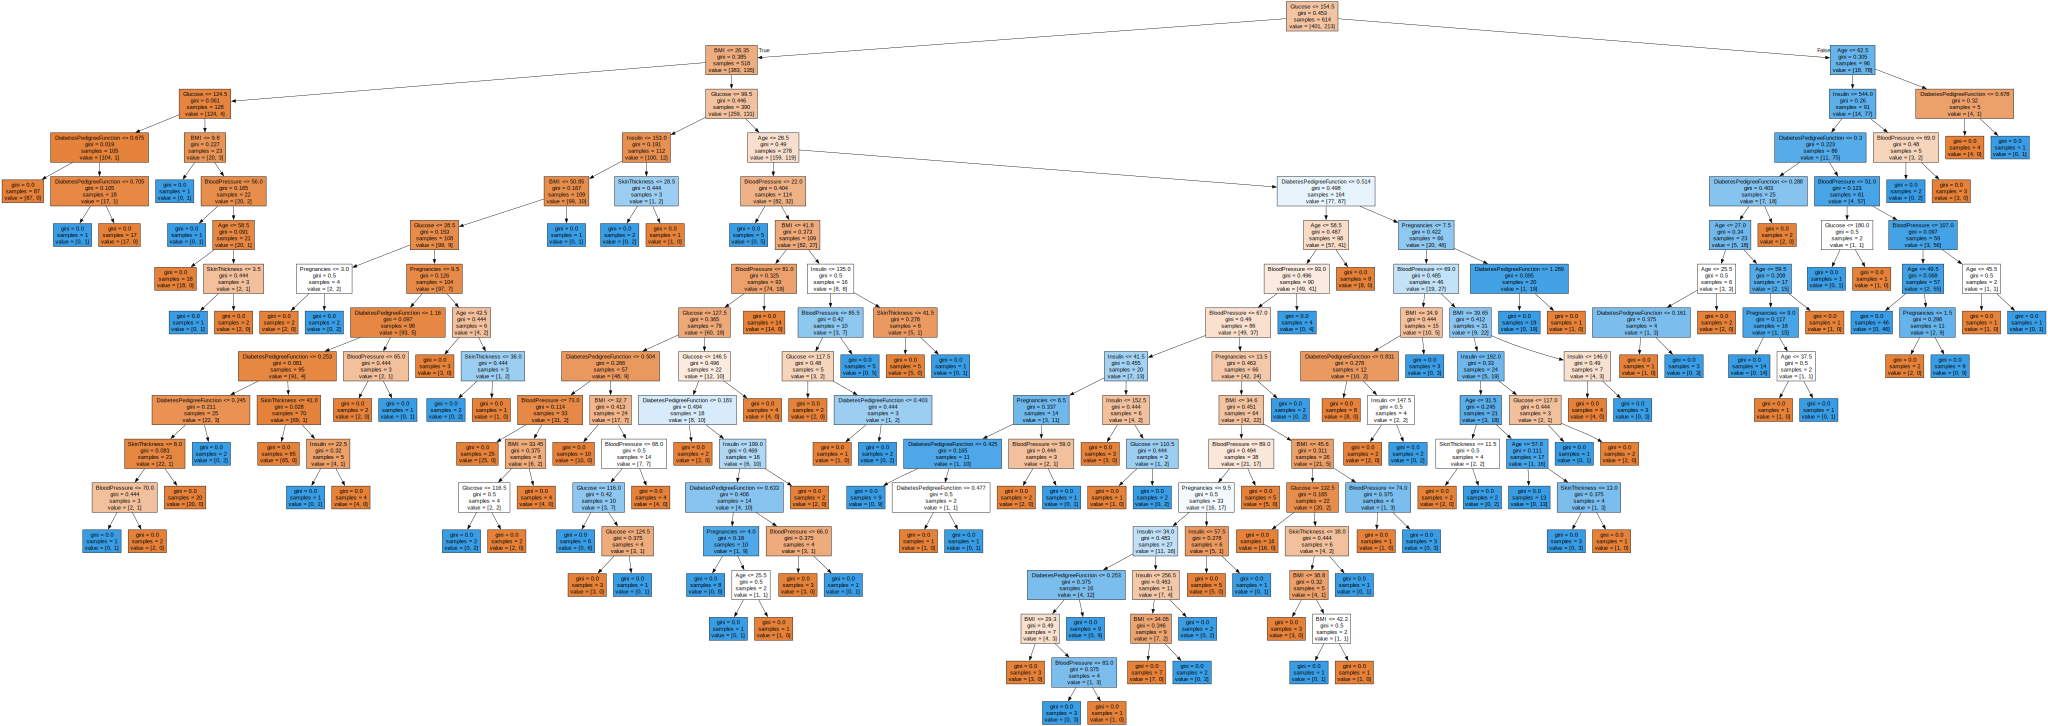

In [44]:
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
graphviz.Source(dot_tree)

In [45]:
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

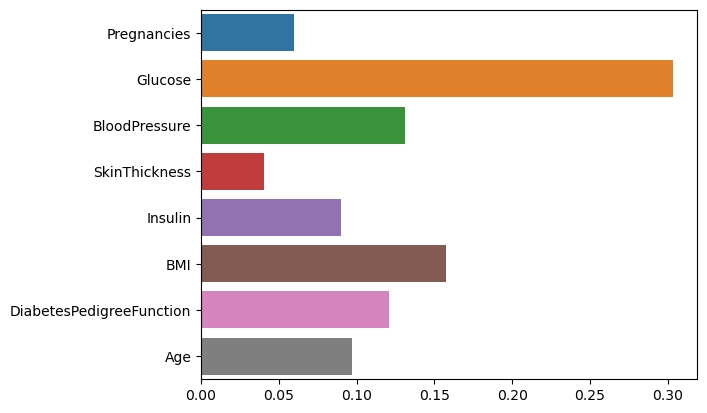

In [46]:
sns.barplot(x=model.feature_importances_, y=feature_names)
plt.show()

In [48]:
diff_cnt = abs(y_test-y_predict).sum()

In [49]:
(len(y_test) - diff_cnt) / len(y_test) * 100

71.42857142857143

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_predict) * 100

71.42857142857143

In [53]:
model.score(x_test, y_test) * 100

71.42857142857143